In [1]:
import pandas as pd
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nomeArquivo = "saidaRemocao" #Sem extensao
df = pd.read_table (nomeArquivo+".txt", sep='\s+')
df["tempoTotal"] = df.apply (lambda row: row["Recebido"] - row["Enviado"], axis=1)
df["tempoRegra"] = df.apply (lambda row: row["tempoTotal"] / row["Regras"], axis=1)
df.set_index('Execucao','Regras')
df

,Execucao,Regras,Enviado,Recebido,tempoTotal,tempoRegra
0,1,250,10.865194,15.680365,4.815171,0.019261
1,1,500,27.868359,39.714827,11.846468,0.023693
2,1,750,60.327460,78.638485,18.311025,0.024415
3,1,1000,112.743222,146.749889,34.006667,0.034007
4,1,1250,197.555295,244.723121,47.167826,0.037734
5,1,1500,321.939987,387.600514,65.660527,0.043774
6,1,1750,481.425451,577.577088,96.151637,0.054944
7,1,2000,762.889969,941.733432,178.843463,0.089422
8,1,2250,1210.448976,1560.606344,350.157368,0.155625
9,2,250,8.392367,14.472748,6.080381,0.024322


In [3]:
gpb = df.groupby (["Regras"])

In [4]:
# Função para cálculo do intervalo de confiança de 95%
def confinterval (data):
    confidence = 0.95
    return st.sem (data) * st.t.ppf ((1 + confidence) / 2.0, len (data) - 1);

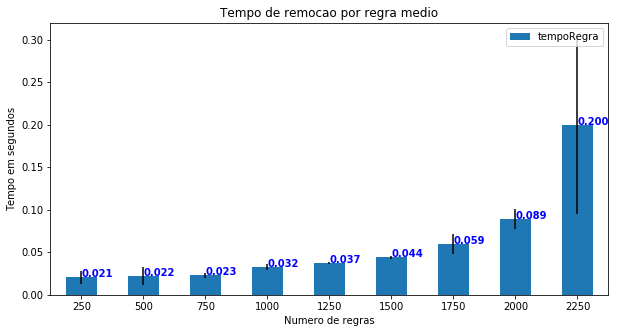

In [5]:
# Grafico da porcentagem de perda de pacotes em relação aos pacotes transmitidos no slice
err = gpb.aggregate(confinterval)
media = gpb.mean()
err = err.filter(items=['tempoRegra'])
media = media.filter(items=['tempoRegra'])

media.plot (kind='bar', yerr=err, title="Tempo de remocao por regra medio", rot=360, figsize=(10,5))
plt.xlabel('Numero de regras')
plt.ylabel('Tempo em segundos')
for i, v in enumerate(media['tempoRegra']):
    plt.text(i, v, str("%.3f" %v), color='blue', fontweight='bold') #i-0.5 v+1
#plt.gca().legend('Tempototal')
plt.savefig(nomeArquivo+".pdf")
plt.show()